In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Function to generate X

In [3]:
def get_X(n,m,pi,theta):
    z = np.random.binomial(1, pi[0],n)
    X=np.zeros((n,m))
    for i in range(0,n):    
        X[i,:]=np.random.binomial(1, theta[0]*z[i]+theta[1]*(1-z[i]),m)
    return X,z
    

## Sample Usecase

In [4]:
n=1000 #trials
m=10 #tosses in each trial
pi=[0.5,0.5]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
#print('X:\n',X,'\n\n z:',z)

# EM-MLE $\pi$ known 

In [34]:
def EM_Solver1(X,z,pi,theta_init,theta,n_iter):
    n=X.shape[0]
    m=X.shape[1]
    Ep_zgivenx=np.zeros((n,2))
    rowsum=np.sum(X,axis=1)
    a=np.zeros(n)
    b=np.zeros(n)
    c=np.zeros(n)
    d=np.zeros(n)
    
    theta_em=theta_init
    theta_tracker=np.zeros((n_iter+1,2))
    theta_tracker[0]=theta_init
    
    for i in range(0,n_iter):
        a[:]= pi[0]*np.power(theta_em[0],rowsum[:])*np.power(1-theta_em[0],m-rowsum[:])
        b[:]= pi[1]*np.power(theta_em[1],rowsum[:])*np.power(1-theta_em[1],m-rowsum[:])
        Ep_zgivenx[:,0]=a[:]/(a[:]+b[:])
        Ep_zgivenx[:,1]=b[:]/(a[:]+b[:])

        e=np.sum(Ep_zgivenx,axis=0)
        c[:]=rowsum[:]*Ep_zgivenx[:,0]
        d[:]=rowsum[:]*Ep_zgivenx[:,1]
        theta_em[0]=np.sum(c)/(m*e[0])
        theta_em[1]=np.sum(d)/(m*e[1])
        theta_tracker[i+1]=theta_em
        if(np.max(np.abs(theta_tracker[i+1]-theta_tracker[i]))<1e-6):
            print("Iterations until Converge:",i)
            break
    print('Original:',theta,'estimated:',theta_em)
    
   
    
    return theta_tracker,i

In [32]:
def visualizeem1(theta_tracker,theta,i):
    plt.plot(range(0,i),theta_tracker[:i,0])
    plt.plot(range(0,i),theta_tracker[:i,1])
    plt.title("Convergence")
    plt.xlabel("Iteration")
    plt.axhline(y=theta[0], color="black", linestyle="--")
    plt.axhline(y=theta[1], color="black", linestyle="--")
    

# 1a

Converged at: 21
Original: [0.35, 0.6] estimated: [0.3513570541626789, 0.6012020719331159]


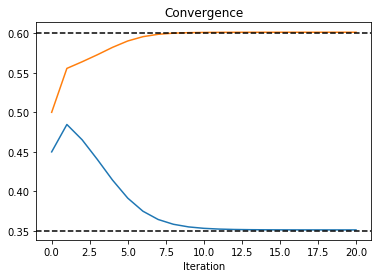

In [33]:
n=1000 #trials
m=10 #tosses in each trial
pi=[0.5,0.5]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.45,0.5]
theta_tracker,conv_iter= EM_Solver1(X,z,pi,theta_init,theta,n_iter=100)
visualizeem1(theta_tracker,theta,conv_iter)

# 1b

Iterations until Converge: 19
Original: [0.35, 0.6] estimated: [0.4385312428875958, 0.6559884812512792]


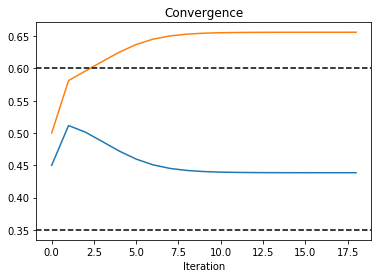

In [38]:
n=1000 #trials
m=10 #tosses in each trial
pi=[0.25,0.75]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.45,0.5]
theta_tracker,conv_iter = EM_Solver1(X,z,[0.5,0.5],theta_init,theta,n_iter=100)
visualizeem1(theta_tracker,theta,conv_iter)

# 1c

Iterations until Converge: 22
Original: [0.35, 0.6] estimated: [0.36877157081969303, 0.6049479320383222]


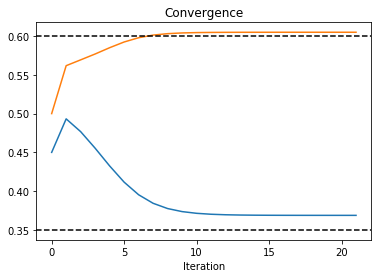

In [37]:
n=1000 #trials
m=10 #tosses in each trial
pi=[0.25,0.75]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.45,0.5]
theta_tracker,conv_iter = EM_Solver1(X,z,pi,theta_init,theta,n_iter=100)
visualizeem1(theta_tracker,theta,conv_iter)

# EM-MLE $\pi$ unknown

In [39]:
def EM_Solver2(X,z,pi_init,pi,theta_init,theta,n_iter):
    n=X.shape[0]
    m=X.shape[1]
    Ep_zgivenx=np.zeros((n,2))
    rowsum=np.sum(X,axis=1)
    a=np.zeros(n)
    b=np.zeros(n)
    c=np.zeros(n)
    d=np.zeros(n)
    
    theta_em=theta_init
    theta_tracker=np.zeros((n_iter+1,2))
    theta_tracker[0]=theta_init
    
    
    pi_em=pi_init
    pi_tracker=np.zeros((n_iter+1,2))
    pi_tracker[0]=pi_init
    
    for i in range(0,n_iter):
        a[:]= pi_em[0]*np.power(theta_em[0],rowsum[:])*np.power(1-theta_em[0],m-rowsum[:])
        b[:]= pi_em[1]*np.power(theta_em[1],rowsum[:])*np.power(1-theta_em[1],m-rowsum[:])
        Ep_zgivenx[:,0]=a[:]/(a[:]+b[:])
        Ep_zgivenx[:,1]=b[:]/(a[:]+b[:])

        e=np.sum(Ep_zgivenx,axis=0)
        c[:]=rowsum[:]*Ep_zgivenx[:,0]
        d[:]=rowsum[:]*Ep_zgivenx[:,1]
        theta_em[0]=np.sum(c)/(m*e[0])
        theta_em[1]=np.sum(d)/(m*e[1])
        pi_em[0] = e[0]/n
        pi_em[1] = 1-pi_em[0]
        theta_tracker[i+1]=theta_em
        pi_tracker[i+1]=pi_em
        if(np.max(np.abs(theta_tracker[i+1]-theta_tracker[i]))<1e-6):
            if(np.max(np.abs(pi_tracker[i+1]-pi_tracker[i]))<1e-6):
                print("Iterations until Convergence:",i)
                break
    print('Original:',theta,'estimated:',theta_em)
    print('Original:',pi,'estimated:',pi_em)
    
   
    
    return theta_tracker,pi_tracker,i

In [40]:
def visualizeem2(theta_tracker,theta,pi_tracker,pi,i):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Convergence')
    ax1.plot(range(0,i),theta_tracker[:i,0])
    ax1.plot(range(0,i),theta_tracker[:i,1])
    ax1.axhline(y=theta[0], color="black", linestyle="--")
    ax1.axhline(y=theta[1], color="black", linestyle="--")
    ax1.set_ylabel("p,q")
    ax1.set_xlabel("Iterations")
    
    ax2.plot(range(0,i),pi_tracker[:i,0])
    ax2.axhline(y=pi[0], color="black", linestyle="--")
    ax2.set_ylabel("$\pi$")
    ax2.set_xlabel("Iterations")
    

# 2a

Iterations until Convergence: 295
Original: [0.35, 0.6] estimated: [0.34099485209699404, 0.5967075390420107]
Original: [0.25, 0.75] estimated: [0.21761743504710768, 0.7823825649528924]


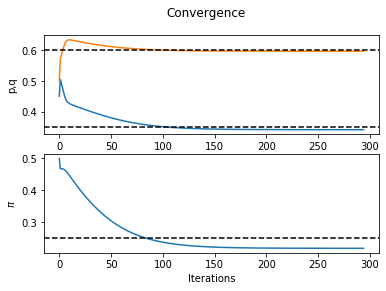

In [43]:
n=10000 #trials
m=10 #tosses in each trial
pi=[0.25,0.75]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.45,0.5]
pi_init=[0.5,0.5]
theta_tracker,pi_tracker,conv_iter = EM_Solver2(X,z,pi_init,pi,theta_init,theta,n_iter=500)
visualizeem2(theta_tracker,theta,pi_tracker,pi,conv_iter)

# 2b

Iterations until Convergence: 317
Original: [0.35, 0.6] estimated: [0.5998815920545818, 0.3514776699780703]
Original: [0.25, 0.75] estimated: [0.7479444304615859, 0.2520555695384141]


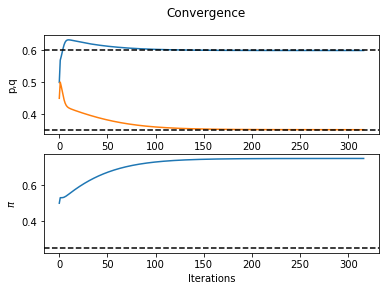

In [45]:
n=10000 #trials
m=10 #tosses in each trial
pi=[0.25,0.75]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.5,0.45]
pi_init=[0.5,0.5]
theta_tracker,pi_tracker,conv_iter = EM_Solver2(X,z,pi_init,pi,theta_init,theta,n_iter=500)
visualizeem2(theta_tracker,theta,pi_tracker,pi,conv_iter)

# EM-MAP with beta prior

In [52]:
def EM_Solver3(X,z,pi_init,pi,theta_init,theta,n_iter,beta_prior):
    n=X.shape[0]
    m=X.shape[1]
    Ep_zgivenx=np.zeros((n,2))
    rowsum=np.sum(X,axis=1)
    a=np.zeros(n)
    b=np.zeros(n)
    c=np.zeros(n)
    d=np.zeros(n)
    
    theta_em=theta_init
    theta_tracker=np.zeros((n_iter+1,2))
    theta_tracker[0]=theta_init
    
    
    pi_em=pi_init
    pi_tracker=np.zeros((n_iter+1,2))
    pi_tracker[0]=pi_init
    
    for i in range(0,n_iter):
        a[:]= pi_em[0]*np.power(theta_em[0],rowsum[:])*np.power(1-theta_em[0],m-rowsum[:])
        b[:]= pi_em[1]*np.power(theta_em[1],rowsum[:])*np.power(1-theta_em[1],m-rowsum[:])
        Ep_zgivenx[:,0]=a[:]/(a[:]+b[:])
        Ep_zgivenx[:,1]=b[:]/(a[:]+b[:])

        e=np.sum(Ep_zgivenx,axis=0)
        c[:]=rowsum[:]*Ep_zgivenx[:,0]
        d[:]=rowsum[:]*Ep_zgivenx[:,1]
        theta_em[0]=np.sum(c)/(m*e[0])
        theta_em[1]=np.sum(d)/(m*e[1])
        pi_em[0] = (e[0]+n*(beta_prior[0]-1))/(n*(beta_prior[0]+ beta_prior[1]-1))
        pi_em[1] = 1-pi_em[0]
        theta_tracker[i+1]=theta_em
        pi_tracker[i+1]=pi_em
        if(np.max(np.abs(theta_tracker[i+1]-theta_tracker[i]))<1e-6):
            if(np.max(np.abs(pi_tracker[i+1]-pi_tracker[i]))<1e-6):
                print("Iterations until Convergence:",i)
                break        
    print('Original:',theta,'estimated:',theta_em)
    print('Original:',pi,'estimated:',pi_em)
    
   
    
    return theta_tracker,pi_tracker,i

# Beta(2,4)

Iterations until Convergence: 23
Original: [0.35, 0.6] estimated: [0.34501164639655296, 0.5995019879552935]
Original: [0.25, 0.75] estimated: [0.24992094204142376, 0.7500790579585762]


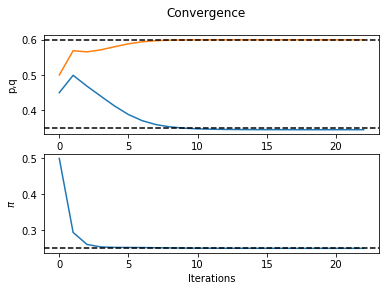

In [53]:
n=10000 #trials
m=10 #tosses in each trial
n_iter=200
pi=[0.25,0.75]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.45,0.5]
pi_init=[0.5,0.5]
beta_prior=[2.0,4.0]
theta_tracker,pi_tracker,conv_iter = EM_Solver3(X,z,pi_init,pi,theta_init,theta,n_iter,beta_prior)
visualizeem2(theta_tracker,theta,pi_tracker,pi,conv_iter)

# Beta(1,3)

Iterations until Convergence: 74
Original: [0.35, 0.6] estimated: [0.03176877898108553, 0.5377240969466551]
Original: [0.25, 0.75] estimated: [0.001175398224093132, 0.9988246017759068]


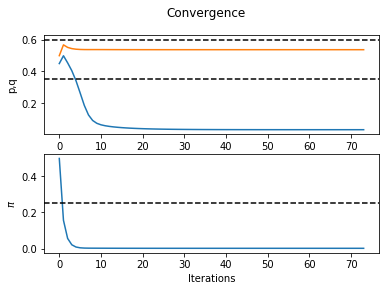

In [57]:
n=10000 #trials
m=10 #tosses in each trial
n_iter=200
pi=[0.25,0.75]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.45,0.5]
pi_init=[0.5,0.5]
beta_prior=[1.0,3.0]
theta_tracker,pi_tracker,conv_iter = EM_Solver3(X,z,pi_init,pi,theta_init,theta,n_iter,beta_prior)
visualizeem2(theta_tracker,theta,pi_tracker,pi,conv_iter)

# Beta(2,6)

Iterations until Convergence: 23
Original: [0.35, 0.6] estimated: [0.310216956734394, 0.5886808204681154]
Original: [0.25, 0.75] estimated: [0.1672208173140243, 0.8327791826859757]


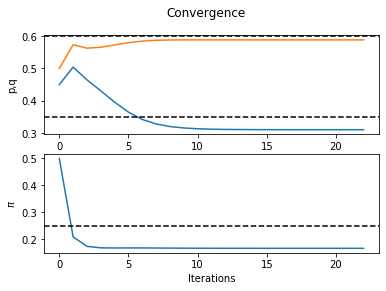

In [58]:
n=10000 #trials
m=10 #tosses in each trial
n_iter=200
pi=[0.25,0.75]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.45,0.5]
pi_init=[0.5,0.5]
beta_prior=[2.0,6.0]
theta_tracker,pi_tracker,conv_iter = EM_Solver3(X,z,pi_init,pi,theta_init,theta,n_iter,beta_prior)
visualizeem2(theta_tracker,theta,pi_tracker,pi,conv_iter)

# Beta(3,9)

Iterations until Convergence: 22
Original: [0.35, 0.6] estimated: [0.3245883562473422, 0.5928488914090831]
Original: [0.25, 0.75] estimated: [0.20030729433715083, 0.7996927056628491]


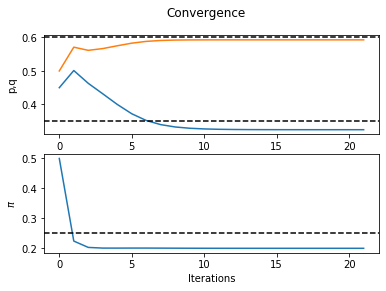

In [73]:
n=10000 #trials
m=10 #tosses in each trial
n_iter=200
pi=[0.25,0.75]
theta=[0.35,0.6]
X,z=get_X(n,m,pi,theta)
theta_init=[0.45,0.5]
pi_init=[0.5,0.5]
beta_prior=[3.0,9.0]
theta_tracker,pi_tracker,conv_iter = EM_Solver3(X,z,pi_init,pi,theta_init,theta,n_iter,beta_prior)
visualizeem2(theta_tracker,theta,pi_tracker,pi,conv_iter)

# Beta distributions 

Text(0, 0.5, '(3,9)')

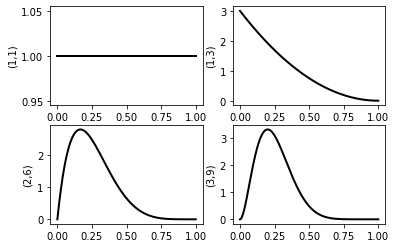

In [72]:
from scipy.stats import beta
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
x=np.linspace(0,1,1000)
rv = beta(1, 1)
ax1.plot(x, rv.pdf(x), 'k-', lw=2)
ax1.set_ylabel('(1,1)')

rv = beta(1, 3)
ax2.plot(x, rv.pdf(x), 'k-', lw=2)
ax2.set_ylabel('(1,3)')


rv = beta(2, 6)
ax3.plot(x, rv.pdf(x), 'k-', lw=2)
ax3.set_ylabel('(2,6)')


rv = beta(3, 9)
ax4.plot(x, rv.pdf(x), 'k-', lw=2)
ax4.set_ylabel('(3,9)')

Text(0, 0.5, '(2,4)')

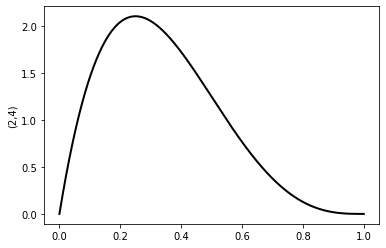

In [75]:
fig, ax=plt.subplots(1)
x=np.linspace(0,1,1000)
rv = beta(2, 4)
ax.plot(x, rv.pdf(x), 'k-', lw=2)
ax.set_ylabel('(2,4)')